<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [18]:
#Load Jester dataset
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', na_values=["?"],header=None)  
data = data.replace(99, np.NaN)
data = data.drop(data.columns[0], axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.idxmax(axis="columns")

0        29
1        10
2        13
3         2
4        53
         ..
24978    64
24979    39
24980    51
24981    29
24982    14
Length: 24983, dtype: int64

In [20]:
data.idxmin(axis="columns")

0         7
1         6
2        17
3        38
4        16
         ..
24978    87
24979    28
24980    35
24981     5
24982    19
Length: 24983, dtype: int64

In [21]:
arr = data.values
print(arr.shape)

(24983, 100)


In [22]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [23]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [24]:
new_arr, idx = replace(arr, 0.1)

In [25]:
arr[idx[0][0], idx[1][0]]

nan

In [26]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [27]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [28]:
latent_item_features

array([[0.169, 0.871],
       [0.131, 0.145],
       [0.547, 0.929],
       [0.235, 0.448],
       [0.295, 0.562],
       [0.477, 0.111],
       [0.65 , 0.474],
       [0.206, 0.858],
       [0.778, 0.375],
       [0.092, 0.699],
       [0.392, 0.654],
       [0.456, 0.39 ],
       [0.527, 0.61 ],
       [0.827, 0.76 ],
       [0.929, 0.073],
       [0.676, 0.848],
       [0.667, 0.117],
       [0.192, 0.863],
       [0.031, 0.322],
       [0.788, 0.81 ],
       [0.623, 0.574],
       [0.297, 0.522],
       [0.733, 0.727],
       [0.248, 0.764],
       [0.388, 0.453],
       [0.111, 0.758],
       [0.201, 0.581],
       [0.152, 0.626],
       [0.171, 0.939],
       [0.219, 0.208],
       [0.753, 0.66 ],
       [0.785, 0.663],
       [0.799, 0.803],
       [0.693, 0.033],
       [0.105, 0.343],
       [0.471, 0.486],
       [0.212, 0.296],
       [0.582, 0.353],
       [0.424, 0.469],
       [0.906, 0.632],
       [0.005, 0.086],
       [0.655, 0.308],
       [0.24 , 0.684],
       [0.1

In [29]:
latent_user_preferences

array([[0.522, 0.529],
       [0.9  , 0.314],
       [0.517, 0.155],
       ...,
       [0.984, 0.639],
       [0.316, 0.6  ],
       [0.476, 0.447]])

In [32]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=24.345660
Iteration 1/10:	MSE=24.105419
Iteration 2/10:	MSE=23.863665
Iteration 3/10:	MSE=23.620751
Iteration 4/10:	MSE=23.378784
Iteration 5/10:	MSE=23.139442
Iteration 6/10:	MSE=22.904009
Iteration 7/10:	MSE=22.673314
Iteration 8/10:	MSE=22.447629
Iteration 9/10:	MSE=22.226552


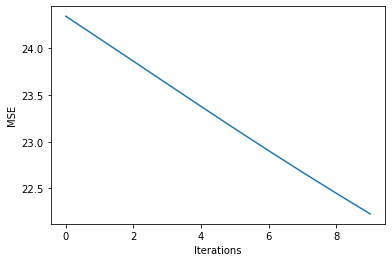

In [35]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [36]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.167, 0.864, 0.865, ..., 1.376, 0.706, 1.774],
       [1.256, 1.146, 1.018, ..., 1.738, 0.966, 1.92 ],
       [2.471, 2.027, 1.911, ..., 3.148, 1.682, 3.766],
       ...,
       [1.426, 1.188, 1.11 , ..., 1.839, 0.989, 2.175],
       [1.061, 0.73 , 0.764, ..., 1.184, 0.588, 1.61 ],
       [1.946, 1.521, 1.474, ..., 2.389, 1.253, 2.962]])

In [37]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [38]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.1670344133522488)","(8.79, 0.8642111527609837)","(-9.66, 0.864776127000469)","(-8.16, -0.2887838417359151)","(-7.52, 0.8458592392091571)","(-8.5, 1.9388468886897603)","(-9.85, 0.16736664172613386)","(4.17, -0.18792723952580323)","(-8.98, 0.17675655231739468)","(-4.76, 1.3929655376294152)",...,"(2.82, 2.024292044107199)","(nan, 1.5497255316670302)","(nan, 2.4361909325139965)","(nan, 1.390486564557432)","(nan, 1.3289871383460123)","(nan, 1.695737384024021)","(-5.63, 1.771450414327935)","(nan, 1.3756143532148088)","(nan, 0.7057630670297206)","(nan, 1.7738991751052053)"
1,"(4.08, 1.255586103434396)","(-0.29, 1.1457118450823927)","(6.36, 1.017975453035726)","(4.37, -0.05000155030875589)","(-2.38, 0.9593241989668787)","(-9.66, 2.185879296871646)","(-0.73, 0.3942217570909907)","(-5.34, -0.05743895918452009)","(8.88, 0.44566163181601726)","(9.22, 1.5893581540897208)",...,"(2.82, 2.0914650465600797)","(-4.95, 1.8174127221073402)","(-0.29, 2.42708626291309)","(7.86, 1.514853715260042)","(-0.19, 1.5314151159127911)","(-2.14, 1.9566935387526723)","(3.06, 1.9185804422982837)","(0.34, 1.7382243054519357)","(-4.32, 0.9658415413545633)","(1.07, 1.9199642241280301)"
2,"(nan, 2.470621945291658)","(nan, 2.026504762845343)","(nan, 1.910628689668591)","(nan, -0.37355944492321674)","(9.03, 1.8356461665366492)","(9.27, 4.195697655712222)","(9.03, 0.5496636896578126)","(9.27, -0.2658086349595265)","(nan, 0.6072491399195441)","(nan, 3.031652188934565)",...,"(nan, 4.206608967570318)","(nan, 3.41769753158325)","(nan, 4.980515120973468)","(9.08, 2.9608760843474844)","(nan, 2.9061428211423936)","(nan, 3.710560037195296)","(nan, 3.761775714928194)","(nan, 3.1477394595824073)","(nan, 1.6824947638767231)","(nan, 3.765818830653217)"
3,"(nan, 1.3491926183966216)","(8.35, 0.8611960996142648)","(nan, 0.9438194045100545)","(nan, -0.5003579102106975)","(1.8, 0.9464104288718217)","(8.16, 2.177659807329196)","(-2.82, 0.05671455785243973)","(6.21, -0.30970676404358954)","(nan, 0.041168925160317164)","(1.84, 1.5524621592594203)",...,"(nan, 2.395454102904324)","(nan, 1.695753004220916)","(nan, 2.9403224248347386)","(0.53, 1.5954769220800868)","(nan, 1.4715425141762999)","(nan, 1.875930143125856)","(nan, 2.039827883868786)","(nan, 1.4254031184132556)","(nan, 0.6840196833649214)","(nan, 2.0434577068794137)"
4,"(8.5, 2.371106251998147)","(4.61, 2.071749103437008)","(-4.17, 1.8851297017639341)","(-5.39, -0.20533726521033213)","(1.36, 1.7906642368386996)","(1.6, 4.085404752799885)","(7.04, 0.6533541905804969)","(4.61, -0.17005304749656697)","(-0.44, 0.7329086398114717)","(5.73, 2.962829421017434)",...,"(5.19, 3.986387792065381)","(5.58, 3.3682264640000894)","(4.27, 4.6659393747285085)","(5.19, 2.852694920639836)","(5.73, 2.848774052832864)","(1.55, 3.6388279902599474)","(3.11, 3.617724781390384)","(6.55, 3.172678047518347)","(1.8, 1.7360728223106834)","(1.6, 3.620870122707074)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 1.7324775692559757)","(7.43, 1.3647386143481688)","(9.08, 1.3169527364736857)","(2.33, -0.32993641581506167)","(3.2, 1.2743603871333162)","(6.75, 2.9160979109447993)","(-8.79, 0.32959312922147743)","(-0.53, -0.2241411684435483)","(-8.74, 0.35919371983824433)","(7.23, 2.10223706918311)",...,"(8.83, 2.9723443838346437)","(-1.21, 2.3574536244339623)","(9.22, 3.5430740939459087)","(-6.7, 2.0713406450651375)","(8.45, 2.0113860634113725)","(9.03, 2.5674625636758375)","(6.55, 2.634558757092012)","(8.69, 2.1399510275191442)","(8.79, 1.125959269622334)","(7.43, 2.637720100646731)"
24979,"(9.13, 0.40839074644158263)","(-8.16, 0.19629560389505274)","(8.59, 0.25957309630400116)","(9.08, -0.22918519162919462)","(0.87, 0.271776880096027)","(-8.93, 0.6293696065922733)","(-3.5, -0.04668710501303353)","(5.78, -0.13690497932754805)","(-8.11, -0.06371812910233467)","(4.9, 0.44287584666948787)",...,"(-1.17, 0.7508556230289791)","(-5.73, 0.468537811898